In [1]:
import pandas as pd
import random
import numpy as np

from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb


from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
from keras import backend as K
from keras import models
from keras import layers
from keras import optimizers
from keras import Sequential
from keras import losses
from keras import metrics
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
#построение диаграммы
def barplot(x_data, y_data, error_data, x_label="", y_label="", title="", cnt_l = 40, cnt_r = 15):
    fig, ax = plt.subplots(figsize = (cnt_l, cnt_r))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center', width = 0.9)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

    fig.savefig(title + '.png')
    
    plt.show()

#подсчет ошибок
def count_errors(y_pred, y_true, n):
    res = [0 for i in range(0,n)]
    
    cnt = 0
    
    for i in y_pred:
        i_true = y_true.iloc[cnt]
        if i != i_true:
            c = res.pop(i_true)
            res.insert(i_true, c + 1)
        cnt = cnt + 1
    return res

#построение матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, savef = False, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize = (20,20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if savef:
        fig.savefig(title + '.png')
    plt.show()
    return ax

In [4]:
#обучение и проверка классификатора
def learn_test_classifier(x_train, y_train, x_test, y_test, classifier):
    classifier.fit(x_train, y_train)
    res = classifier.predict(x_test)

    print('hamming_loss: ', hamming_loss(y_test, res))
    print('matthews_corrcoef: ', matthews_corrcoef(y_test, res))
    print('accuracy_score: ', accuracy_score(y_test, res))
    print('precision_score: ', precision_score(y_test, res, average='macro'))
    print('recall_score: ', recall_score(y_test, res, average='macro'))
    print('f1_score: ', f1_score(y_test, res, average='macro'))
    
    return res

#прогон кластера
def start_clustering(data, y_test, cluster):
    cluster.fit(data)
    res = cluster3.labels_

    print('accuracy_score: ', accuracy_score(y_test, res))
    print('hamming_loss: ', hamming_loss(y_test, res))
    print('matthews_corrcoef: ', matthews_corrcoef(y_test, res))
    print('precision_score: ', precision_score(y_test, res, average='macro'))
    print('recall_score: ', recall_score(y_test, res, average='macro'))
    print('f1_score: ', f1_score(y_test, res, average='macro'))
    print('completeness_score: ', completeness_score(y_test, res))
    print('adjusted_rand_score: ', adjusted_rand_score(y_test, res))
    print('v_measure_score: ', v_measure_score(y_test, res))
    
    return res

In [5]:
data = pd.read_csv('Data/Gaia/GaiaSource/GaiaSource0.csv' )
s = 'Data/Gaia/GaiaSource/GaiaSource'
for i in range(20,47):#47):
    s1 = s + str(i) + '.csv'
    data = data.append(pd.read_csv(s1), ignore_index=True)

In [6]:
data = data.drop(columns=['astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type', 'matched_observations',
       'duplicated_source', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'phot_g_n_obs',
       'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_bp_n_obs',
       'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs',
       'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'bp_rp', 'bp_g', 'g_rp']) 

data = data.drop(columns=['rv_template_teff', 'rv_template_logg', 'rv_template_fe_h',
       'phot_variable_flag', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags',
       'teff_val', 'teff_percentile_lower', 'teff_percentile_upper', 'a_g_val',
       'a_g_percentile_lower', 'a_g_percentile_upper', 'e_bp_min_rp_val',
       'e_bp_min_rp_percentile_lower', 'e_bp_min_rp_percentile_upper',
       'flame_flags'])
data.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,phot_proc_mode,radial_velocity,radial_velocity_error,rv_nb_transits,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,Gaia DR2 1000225938242805248,1000225938242805248,1197051105,2015.5,103.447529,0.041099,56.022025,0.045175,0.582790,...,0,NaN,NaN,0,1.024730,1.017359,1.038814,1.075774,0.801798,1.349751
1,1635721458409799680,Gaia DR2 1000383512003001728,1000383512003001728,598525552,2015.5,105.187856,0.016978,56.267982,0.016904,1.385686,...,0,NaN,NaN,0,1.388711,1.311143,1.453106,1.937890,1.852440,2.023341
2,1635721458409799680,Gaia DR2 1000274106300491264,1000274106300491264,299262776,2015.5,103.424758,0.464608,56.450903,0.582490,0.314035,...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1635721458409799680,Gaia DR2 1000396156385741312,1000396156385741312,1148557518,2015.5,105.049751,0.838232,56.508777,0.744511,1.939951,...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1635721458409799680,Gaia DR2 1000250024419296000,1000250024419296000,574278759,2015.5,103.352525,0.023159,56.395144,0.022836,0.747108,...,0,NaN,NaN,0,1.507958,1.435618,1.540208,2.427377,2.152597,2.702158


In [7]:
data = data.drop(columns = ['radial_velocity', 'radial_velocity_error', 'rv_nb_transits','phot_proc_mode', ])

In [8]:
data1 = pd.read_csv('Data/Gaia/light_curve/light_curves0.csv')

s = 'Data/Gaia/light_curve/light_curves'
for i in range(15,19):
    s1 = s + str(i) + '.csv'
    data1 = data1.append(pd.read_csv(s1))

In [9]:
data = data.dropna()
data_m = data.merge(data1, on='source_id')

In [10]:
data_m = data_m.drop(columns = ['solution_id_x', 'solution_id_y', 'rejected_by_photometry','rejected_by_variability', 'other_flags', 'random_index'])

In [11]:
data_m = data_m.drop(columns = ['radius_percentile_lower','radius_percentile_upper','lum_percentile_lower','lum_percentile_upper'])
data_m = data_m.drop(columns = ['designation'])# 'random_index', 'ref_epoch'
data_m.head()

,source_id,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,...,pmra_pmdec_corr,radius_val,lum_val,transit_id,band,time,mag,flux,flux_error,flux_over_error
0,1762304559921296768,2015.5,311.392496,0.032176,14.861018,0.032321,1.146271,0.039372,29.11372,10.371885,...,0.021288,0.812044,0.373563,20229154356912906,G,1762.678844,15.579629,11053.368985,15.153247,729.43896
1,1762304559921296768,2015.5,311.392496,0.032176,14.861018,0.032321,1.146271,0.039372,29.11372,10.371885,...,0.021288,0.812044,0.373563,21845830561607793,G,1791.913111,15.568158,11170.774175,15.306830,729.79016
2,1762304559921296768,2015.5,311.392496,0.032176,14.861018,0.032321,1.146271,0.039372,29.11372,10.371885,...,0.021288,0.812044,0.373563,23127363079786977,G,1815.087231,15.579278,11056.943748,18.126910,609.97400
3,1762304559921296768,2015.5,311.392496,0.032176,14.861018,0.032321,1.146271,0.039372,29.11372,10.371885,...,0.021288,0.812044,0.373563,23131455361570703,G,1815.161233,15.565434,11198.833624,106.208811,105.44167
4,1762304559921296768,2015.5,311.392496,0.032176,14.861018,0.032321,1.146271,0.039372,29.11372,10.371885,...,0.021288,0.812044,0.373563,29804144275367582,G,1935.835025,15.584589,11002.988241,17.473031,629.71260


In [12]:
for i in data_m.columns:
    if not i in ['phot_rp_n_obs', 'source_id','flux', 'flux_over_error', 'flux_error', 'time', 'mag', 'rejected_by_photometry','rejected_by_variability', 'band', 'random_index', 'ref_epoch', 'other_flags'] :
        data_m[i] = data_m[i].apply(lambda x: x+random.uniform(-0.85, 1.255))

In [13]:
z1 = []

for i in data_m['band'].drop_duplicates():
    z1.append(i)

def f1(x, z1):
    return int(z1.index(x))

data_m['band'] = data_m['band'].apply(lambda x: f1(x, z1))

In [14]:
#выбираем только данные из заданной области
ra = 310.7
dec = 14.56

pdata = []
for i in range(0, len(data_m)):
     if (abs(data_m.loc[i,'ra'] - ra) < 0.3) and (abs(data_m.loc[i,'dec'] - dec) < 0.3):
            pdata.append(data_m.loc[i])
pdata = pd.DataFrame(pdata)


In [15]:
#выбираем только данные из заданной области, которые будут являться примерами нераспознанных данных
pdata1 = []
for i in range(0, len(data_m)):
     if (abs(data_m.loc[i,'ra'] - ra) < 0.6) and (abs(data_m.loc[i,'dec'] - dec) < 0.6) and (abs(data_m.loc[i,'ra'] - ra) >= 0.3) and (abs(data_m.loc[i,'dec'] - dec) >= 0.3) :
            pdata1.append(data_m.loc[i])
pdata1 = pd.DataFrame(pdata1)
pdata1['source_id'] = len(data_m['source_id'].drop_duplicates())


In [16]:
data_m = pd.concat([pdata, pdata1])

In [17]:
z = []

for i in data_m['source_id'].drop_duplicates():
    z.append(i)

def f(x, z):
    return int(z.index(x))

y = data_m['source_id']
y = y.apply(lambda x: f(x, z))

In [18]:
n = len(data_m['source_id'].drop_duplicates())
data_m = data_m.drop(columns = ['source_id'])

In [19]:
print(len(data_m))
y1 = y.apply(lambda x: x if x != max(y)  else max(y) - 1)
print(y1.drop_duplicates())
y = y1

307
1        0
112      1
232      2
302      3
431      4
519      5
606      6
673      7
772      8
849      9
938     10
1070    11
1134    12
1288    13
1331    14
1458    15
1520    16
1608    17
1717    18
1784    19
1932    20
2047    21
2112    22
2257    23
3397    24
4017    25
Name: source_id, dtype: int64


In [20]:
m = len(data_m.columns)
p = len(y.drop_duplicates())

In [21]:

#Создаем основу для нашей модели. Для кросс-идентификации хорошо работает обычный многослойный персептрон
def base_model(input_shape = (m,)):
    input = Input(shape=input_shape)

    x = Dense(m*p*5, activation='relu', use_bias=True)(input)
    x = Dropout(0.5)(x)
    x = Dense(150, activation='relu', use_bias=True)(x)
    x = Dropout(0.1)(x)
    x = Dense(p, activation='softmax')(x)
    return Model(input, x)

#обучение модели жестким классам
def train_cross_entropy(model, train_x, train_y, test_x, test_y, n_epoch = 50, b_size = 1000, b = True):
    adam = optimizers.Adam()

    model.compile(loss=losses.CategoricalCrossentropy(label_smoothing = 0),
                  optimizer=adam,
                  metrics=['accuracy'])
    
    history = model.fit( train_x, train_y, epochs= n_epoch, batch_size = b_size, 
                        validation_data = (test_x, test_y), verbose = b)
    return history

In [22]:
data_m.head()

,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,...,pmra_pmdec_corr,radius_val,lum_val,transit_id,band,time,mag,flux,flux_error,flux_over_error
1,2015.5,310.692360,0.929387,14.454485,0.698232,0.350792,-0.643130,30.224357,10.861849,1.250292,...,-0.115980,1.536240,1.284569,2.184583e+16,0.0,1791.913111,15.568158,11170.774175,15.306830,729.79016
2,2015.5,310.802554,-0.572100,14.520946,0.410919,0.385993,0.514149,30.281564,10.926475,-0.564517,...,0.833209,0.246771,0.833002,2.312736e+16,0.0,1815.087231,15.579278,11056.943748,18.126910,609.97400
5,2015.5,310.929765,1.006966,14.267927,-0.175774,2.254773,0.813130,30.002887,10.767074,0.626469,...,0.597970,0.707193,0.449657,2.980824e+16,0.0,1935.909038,15.586536,10983.275883,24.302258,451.94467
8,2015.5,310.657555,-0.301927,14.855281,0.858878,0.989193,-0.103455,29.182927,10.546380,-0.068250,...,-0.790571,1.581256,1.319417,3.828352e+16,0.0,2089.185611,15.545917,11401.962338,18.248400,624.81980
42,2015.5,310.715646,0.437061,14.559234,-0.518968,2.223881,0.940640,30.274087,10.350309,-0.714383,...,0.195978,0.490180,0.739701,3.889613e+16,1.0,2100.264019,16.102538,5006.567453,69.079940,72.47498


In [23]:
data_m.columns
#data_m = data_m.drop(columns = ['transit_id', 'band']) влияет на нейронку с помощью keras, но не влияет на svc 


Index(['ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'radius_val', 'lum_val', 'transit_id', 'band', 'time', 'mag', 'flux',
       'flux_error', 'flux_over_error'],
      dtype='object')

In [24]:
#делим данные на обучающую и тестовую выборки
#делим данные на обучающую и тестовую выборки
#в данном примере test_size = 0.7, эксперименты проводились и для test_size = 0.3, как описано в статье
#на них же и подбиралась часть параметров
X_train, X_test, y_train, y_test = train_test_split(data_m, y, test_size=0.7, random_state = 42, shuffle = True)

In [25]:
#преобразуем данные в формат, подходящий для обучения модели

new_y = []

for i in y:
    el = [0.0 for i in range(p)]
    el[i] = 1.0
    new_y.append(el)
    
cat_y = to_categorical(y.values)

cat_train_y = to_categorical(y_train.values)
cat_test_y = to_categorical(y_test.values)

In [26]:
data = data_m.copy()
for i in data.columns:
    if not i in ['source_id', 'band', 'rejected_by_photometry','rejected_by_variability','other_flags']:
        data[i] /= max(abs(data[i]))

In [27]:
print('knn: ')
knn = KNeighborsClassifier(n_neighbors=2, leaf_size = 50)
knn_res = learn_test_classifier(X_train, y_train, X_test, y_test, knn)
print()

print('dt:')
dt = DecisionTreeClassifier()
dt_res = learn_test_classifier(X_train, y_train, X_test, y_test, dt)
print()

print('rf:')
rf = RandomForestClassifier(criterion = 'entropy')
rf_res = learn_test_classifier(X_train, y_train, X_test, y_test, rf)
print()

print('xgb: ')
xgbM = xgb.XGBClassifier()
xgb_res = learn_test_classifier(X_train, y_train, X_test, y_test, xgbM)
print()

print('lgb: ')
lgbM = lgb.LGBMClassifier(n_estimators=200, silent=True,  num_leaves = 25, learning_rate = 0.03, random_state = 27, objective = 'multiclass')
lgb_res = learn_test_classifier(X_train, y_train, X_test, y_test, lgbM)
print()

print('svc: ')
svc = SVC(kernel= 'sigmoid', verbose = True, random_state = 24, probability = True)
svc_res = learn_test_classifier(X_train, y_train, X_test, y_test, svc)
print()

'''print('mlp: ')
mlp = MLPClassifier(hidden_layer_sizes=((m+p)*30,), verbose = False, max_iter= 50, tol = 0.0001)
mlp_res = learn_test_classifier(X_train, y_train, X_test, y_test, mlp)
print()''' #F1 - 0.00

model1 = base_model((len(X_train.columns), ))
history1 = train_cross_entropy(model1, X_train.values, cat_train_y, X_test.values, cat_test_y, 30, 2000)
print('-------------------------------')

knn: 
hamming_loss:  0.9023255813953488
matthews_corrcoef:  -0.01182154682901245
accuracy_score:  0.09767441860465116
precision_score:  0.033237548880137996
recall_score:  0.05283605283605283
f1_score:  0.02953296703296704

dt:
hamming_loss:  0.3627906976744186
matthews_corrcoef:  0.5342900682497984
accuracy_score:  0.6372093023255814
precision_score:  0.30003468753468754
recall_score:  0.3267843267843268
f1_score:  0.2939235601000307

rf:
hamming_loss: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.4372093023255814
matthews_corrcoef:  0.3702788640069885
accuracy_score:  0.5627906976744186
precision_score:  0.30471701501113263
recall_score:  0.2939060939060939
f1_score:  0.2648137973137973

xgb: 
hamming_loss:  0.3116279069767442
matthews_corrcoef:  0.5985158879472957
accuracy_score:  0.6883720930232559
precision_score:  0.34847677075399847
recall_score:  0.3894438894438894
f1_score:  0.34027076089145736

lgb: 
hamming_loss:  0.3116279069767442
matthews_corrcoef:  0.602112947574661
accuracy_score:  0.6883720930232559
precision_score:  0.3920551670551671
recall_score:  0.4098679098679099
f1_score:  0.35738645200887764

svc: 
[LibSVM]hamming_loss:  0.5395348837209303
matthews_corrcoef:  0.0
accuracy_score:  0.4604651162790698
precision_score:  0.017710196779964223
recall_score:  0.038461538461538464
f1_score:  0.02425281724644782



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 92 samples, validate on 215 samples
Epoch 1/30
92/92 [==============================] - 0s 2ms/step - loss: 1884248860524544.0000 - accuracy: 0.0435 - val_loss: 4738510179270656.0000 - val_accuracy: 0.4605
Epoch 2/30
92/92 [==============================] - 0s 282us/step - loss: 4617685769912320.0000 - accuracy: 0.4783 - val_loss: 2781867229052928.0000 - val_accuracy: 0.4605
Epoch 3/30
92/92 [==============================] - 0s 282us/step - loss: 2923367342538752.0000 - accuracy: 0.4783 - val_loss: 2817865497444352.0000 - val_accuracy: 0.0047
Epoch 4/30
92/92 [==============================] - 0s 271us/step - loss: 2732700859367424.0000 - accuracy: 0.0217 - val_loss: 1932156939010048.0000 - val_accuracy: 0.0233
Epoch 5/30
92/92 [==============================] - 0s 249us/step - loss: 2245917990191104.0000 - accuracy: 0.0326 - val_loss: 1169716357890048.0000 - val_accuracy: 0.0140
Epoch 6/30
92/92 [==============================] - 0s 282us/step - loss: 1771420472311808.0000 -

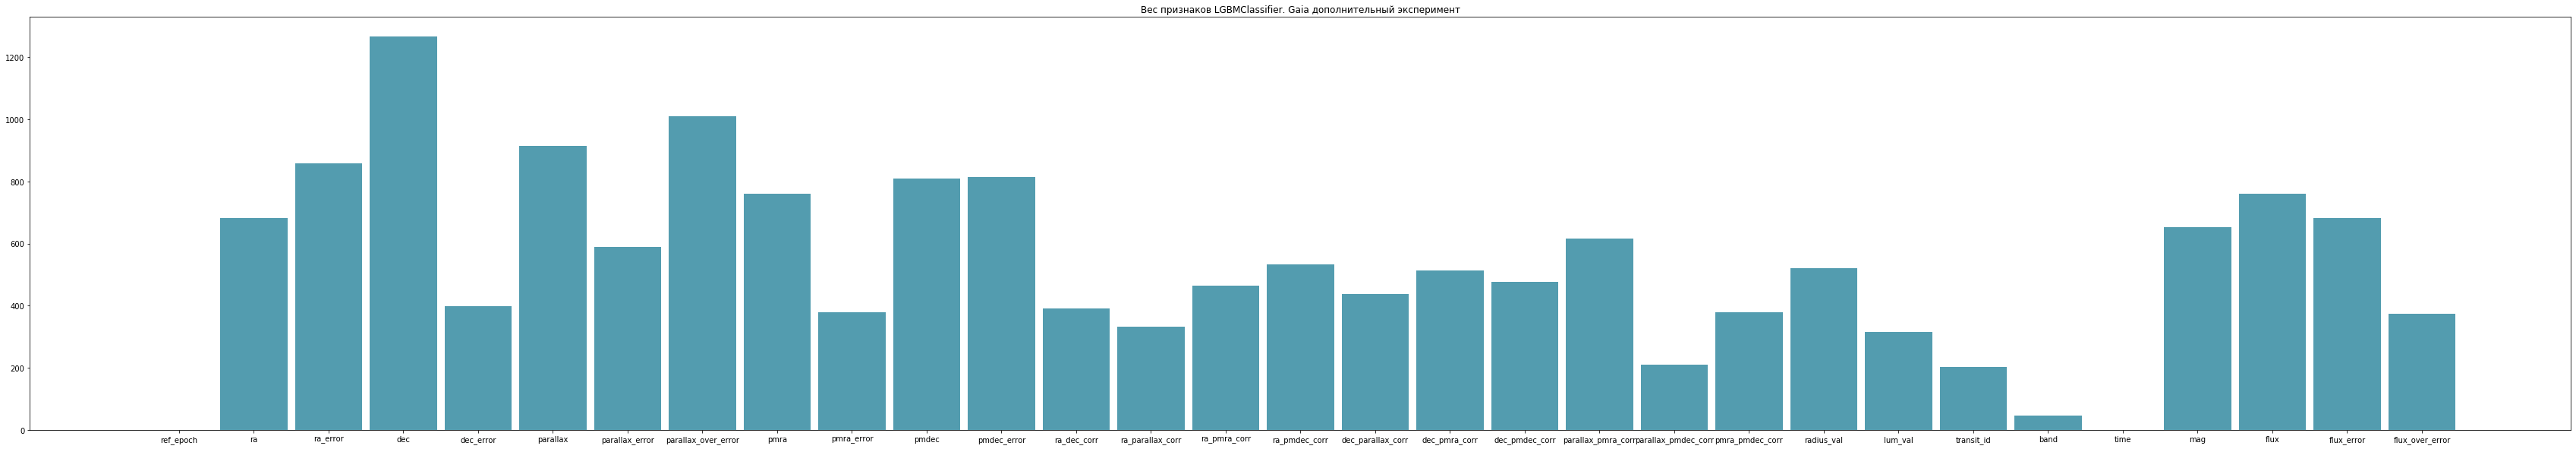

In [28]:
weight_f = lgbM.feature_importances_

col_lab = []
for i in X_train.columns:
    col_lab.append(i)

barplot(col_lab, weight_f, '', '', '', 'Вес признаков LGBMClassifier. Gaia дополнительный эксперимент', 60, 10)

In [31]:
data_1 = data_m.drop(columns = ['ref_epoch', 'time', 'transit_id', 'radius_val', 'parallax_over_error', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',])
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.7, shuffle = True, random_state = 42)

knn: 
hamming_loss:  0.6232558139534884
matthews_corrcoef:  0.09704290724542204
accuracy_score:  0.3767441860465116
precision_score:  0.07369433563908104
recall_score:  0.09664779664779664
f1_score:  0.07793422835585867

dt:
hamming_loss:  0.3209302325581395
matthews_corrcoef:  0.5898183752593773
accuracy_score:  0.6790697674418604
precision_score:  0.35688616938616935
recall_score:  0.3601676101676101
f1_score:  0.32607179145640686

rf:
hamming_loss:  0.4046511627906977
matthews_corrcoef:  0.4236312066005798
accuracy_score:  0.5953488372093023
precision_score:  0.33671776941007714
recall_score: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.30685980685980685
f1_score:  0.3009313029965204

xgb: 
hamming_loss:  0.2930232558139535
matthews_corrcoef:  0.6211841834004604
accuracy_score:  0.7069767441860465
precision_score:  0.3817476665248943
recall_score:  0.38774003774003774
f1_score:  0.36605957139893797

lgb: 
hamming_loss:  0.3209302325581395
matthews_corrcoef:  0.591691394255072
accuracy_score:  0.6790697674418604
precision_score:  0.34479686979686974
recall_score:  0.3856088356088356
f1_score:  0.3304358315525941

svc: 
[LibSVM]hamming_loss:  0.5395348837209303
matthews_corrcoef:  0.0
accuracy_score:  0.4604651162790698
precision_score:  0.017710196779964223
recall_score:  0.038461538461538464
f1_score:  0.02425281724644782

mlp: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

hamming_loss:  0.9395348837209302
matthews_corrcoef:  0.021956508953537575
accuracy_score:  0.06046511627906977
precision_score:  0.004822763443453098
recall_score:  0.052447552447552455
f1_score:  0.008833030486573794

Train on 92 samples, validate on 215 samples
Epoch 1/30
92/92 [==============================] - 0s 4ms/step - loss: 1152341.5000 - accuracy: 0.0435 - val_loss: 236300.5156 - val_accuracy: 0.4605
Epoch 2/30
92/92 [==============================] - 0s 379us/step - loss: 467703.5938 - accuracy: 0.4022 - val_loss: 475070.3125 - val_accuracy: 0.0419
Epoch 3/30
92/92 [==============================] - 0s 390us/step - loss: 1165036.1250 - accuracy: 0.0435 - val_loss: 192198.2656 - val_accuracy: 0.0419
Epoch 4/30
92/92 [==============================] - 0s 444us/step - loss: 419977.3125 - accuracy: 0.0435 - val_loss: 680660.5625 - val_accuracy: 0.4605
Epoch 5/30
92/92 [==============================] - 0s 445us/step - loss: 444511.1250 - accuracy: 0.4783 - val_loss: 993037.625

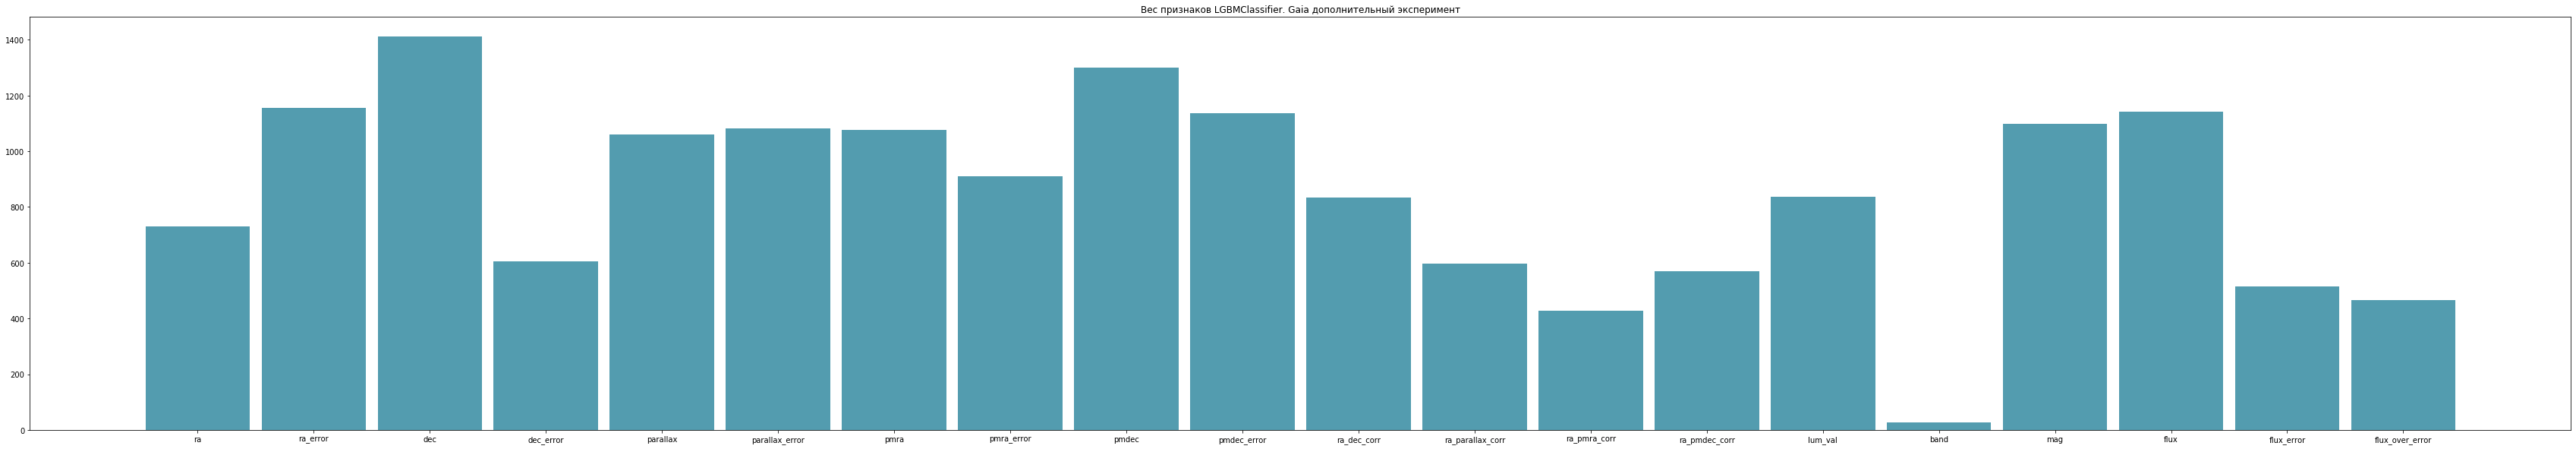

In [32]:
print('knn: ')
knn = KNeighborsClassifier(n_neighbors=5, leaf_size = 30)
knn_res = learn_test_classifier(X_train, y_train, X_test, y_test, knn)
print()

print('dt:')
dt = DecisionTreeClassifier()
dt_res = learn_test_classifier(X_train, y_train, X_test, y_test, dt)
print()

print('rf:')
rf = RandomForestClassifier(criterion = 'entropy')
rf_res = learn_test_classifier(X_train, y_train, X_test, y_test, rf)
print()

print('xgb: ')
xgbM = xgb.XGBClassifier()
xgb_res = learn_test_classifier(X_train, y_train, X_test, y_test, xgbM)
print()

print('lgb: ')
lgbM = lgb.LGBMClassifier(n_estimators=200, silent=True,  num_leaves = 25, learning_rate = 0.03, random_state = 27, objective = 'multiclass')
lgb_res = learn_test_classifier(X_train, y_train, X_test, y_test, lgbM)
print()

print('svc: ')
svc = SVC(kernel='rbf', max_iter = 80, verbose = True, random_state = 24, probability = True)
svc_res = learn_test_classifier(X_train, y_train, X_test, y_test, svc)
print()

print('mlp: ')
mlp = MLPClassifier(hidden_layer_sizes=((m+p)*30,), verbose = False, max_iter= 50, tol = 0.0001)
mlp_res = learn_test_classifier(X_train, y_train, X_test, y_test, mlp)
print()

model1 = base_model((len(X_train.columns), ))
history1 = train_cross_entropy(model1, X_train.values, cat_train_y, X_test.values, cat_test_y, 30, 2000)
print('-------------------------------')

weight_f = lgbM.feature_importances_

col_lab = []
for i in X_train.columns:
    col_lab.append(i)

barplot(col_lab, weight_f, '', '', '', 'Вес признаков LGBMClassifier. Gaia дополнительный эксперимент', 60, 10)

In [33]:
print(len(y.drop_duplicates()))

26


In [34]:
k = y.where(lambda x: x == max(y)).dropna()
print(len(y))
print(len(k))

307
143


Проверка на нормализованных данных

In [36]:
#делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.7, shuffle = True, random_state = 42)

In [37]:
new_y = []

for i in y:
    el = [0.0 for i in range(p)]
    el[i] = 1.0
    new_y.append(el)
    
cat_y = to_categorical(y.values)

cat_train_y = to_categorical(y_train.values)
cat_test_y = to_categorical(y_test.values)

In [38]:
print('knn: ')
knn = KNeighborsClassifier(n_neighbors=5, leaf_size = 30)
knn_res = learn_test_classifier(X_train, y_train, X_test, y_test, knn)
print()

print('dt:')
dt = DecisionTreeClassifier()
dt_res = learn_test_classifier(X_train, y_train, X_test, y_test, dt)
print()

print('rf:')
rf = RandomForestClassifier(criterion = 'entropy')
rf_res = learn_test_classifier(X_train, y_train, X_test, y_test, rf)
print()

print('svc: ')
svc = SVC(kernel='rbf', max_iter = 80, verbose = True, random_state = 24, probability = True)
svc_res = learn_test_classifier(X_train, y_train, X_test, y_test, svc)
print()

print('mlp: ')
mlp = MLPClassifier(hidden_layer_sizes=((m+p)*30,), verbose = False, max_iter= 50, tol = 0.0001)
mlp_res = learn_test_classifier(X_train, y_train, X_test, y_test, mlp)
print()

model1 = base_model((len(data_m.columns), ))
history1 = train_cross_entropy(model1, X_train.values, cat_train_y, X_test.values, cat_test_y, 30, 2000)
print('-------------------------------')

knn: 
hamming_loss:  0.6837209302325581
matthews_corrcoef:  0.03307143298727871
accuracy_score:  0.31627906976744186
precision_score:  0.061896436896436896
recall_score:  0.057942057942057944
f1_score:  0.05822716859506157

dt:
hamming_loss:  0.37209302325581395
matthews_corrcoef:  0.5218670671434732
accuracy_score:  0.627906976744186
precision_score:  0.2818333376025684
recall_score:  0.31120546120546116
f1_score:  0.27529955424692265

rf:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hamming_loss:  0.413953488372093
matthews_corrcoef:  0.40479287956924886
accuracy_score:  0.586046511627907
precision_score:  0.30201256483307765
recall_score:  0.2760739260739261
f1_score:  0.2537602906966302

svc: 
[LibSVM]hamming_loss:  0.5395348837209303
matthews_corrcoef:  0.0
accuracy_score:  0.4604651162790698
precision_score:  0.017710196779964223
recall_score:  0.038461538461538464
f1_score:  0.02425281724644782

mlp: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't conver

hamming_loss:  0.5395348837209303
matthews_corrcoef:  0.10726515738934929
accuracy_score:  0.4604651162790698
precision_score:  0.06953165881737311
recall_score:  0.060994560994561006
f1_score:  0.05580851134958045

Train on 92 samples, validate on 215 samples
Epoch 1/30
92/92 [==============================] - 0s 2ms/step - loss: 3.2649 - accuracy: 0.0543 - val_loss: 2.8880 - val_accuracy: 0.4605
Epoch 2/30
92/92 [==============================] - 0s 304us/step - loss: 2.8413 - accuracy: 0.4783 - val_loss: 2.5822 - val_accuracy: 0.4605
Epoch 3/30
92/92 [==============================] - 0s 369us/step - loss: 2.4911 - accuracy: 0.4783 - val_loss: 2.4320 - val_accuracy: 0.4605
Epoch 4/30
92/92 [==============================] - 0s 336us/step - loss: 2.3004 - accuracy: 0.4783 - val_loss: 2.5260 - val_accuracy: 0.4605
Epoch 5/30
92/92 [==============================] - 0s 390us/step - loss: 2.3267 - accuracy: 0.4783 - val_loss: 2.6190 - val_accuracy: 0.4605
Epoch 6/30
92/92 [=============

Кластеризация

In [39]:
cluster1 = SpectralClustering(n_clusters = n, random_state = 25, affinity = 'nearest_neighbors', n_neighbors=3)#'rbf')#
y_test1 = y
data1 = data_m
cluster1.fit(data1)
res = cluster1.labels_

print('completeness_score: ', completeness_score(y_test1, res))
print('adjusted_rand_score: ', adjusted_rand_score(y_test1, res))
print('v_measure_score: ', v_measure_score(y_test1, res))
print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


completeness_score:  0.2444768284662575
adjusted_rand_score:  0.010274429107949614
v_measure_score:  0.23917867178629423



In [40]:
cluster2 = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean')
cluster2.fit(data1)
res = cluster2.labels_

print('completeness_score: ', completeness_score(y_test1, res))
print('adjusted_rand_score: ', adjusted_rand_score(y_test1, res))
print('v_measure_score: ', v_measure_score(y_test1, res))


completeness_score:  0.24071492987726076
adjusted_rand_score:  0.0012520211573003972
v_measure_score:  0.2793149311051679


In [41]:
cluster3 = KMeans(n_clusters= n, init = 'random', n_init=5, max_iter=500)
cluster3.fit(data1)
res = cluster3.labels_

print('completeness_score: ', completeness_score(y_test1, res))
print('adjusted_rand_score: ', adjusted_rand_score(y_test1, res))
print('v_measure_score: ', v_measure_score(y_test1, res))

completeness_score:  0.2401698312177716
adjusted_rand_score:  -0.003322683752815329
v_measure_score:  0.2777365322815022
